<a href="https://colab.research.google.com/github/YOGDEV/Boston_House_Price_Prediction_MachineLearning/blob/main/Boston_house_pricing_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing liberaries

In [1]:
import numpy as np
import pandas as pd
import sklearn

Now we will load the data we will be using to train our model

Here we are using boston house pricing  dataset which is avaliable in the sklearn liberary itself.

In [ ]:
from sklearn.datasets import load_boston
df=load_boston()

In [5]:
df.keys() #returns all the keys of the dataset dictionary

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
print(df.DESCR) # info about the dataset

In [ ]:
boston=pd.DataFrame(df.data,columns=df.feature_names)#converting dictionary into table format for easy calculations
boston.head() #first five lines

In [ ]:
 boston['TARGET']=df.target
 boston.head()

In [ ]:
boston.isnull() #true means null value is present  

In [ ]:
boston.isnull().sum() # 0 indicates that there is no null value in a given table 

We never train the model on all the data that we have , we always make sure to atleast have a test dataset , which is different from the teaining dataset.

In [32]:
from sklearn.model_selection import train_test_split

X=boston.drop('TARGET',axis=1)# axis=1 means droping column form copy of boston dataset
Y=boston['TARGET']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.15,random_state=1)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(430, 13)
(76, 13)
(430,)
(76,)


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # for error

In [35]:
#fitting model on the taining dataset

lin_model=LinearRegression()
lin_model.fit(X_train,Y_train)

LinearRegression()

In [37]:
y_train_predict=lin_model.predict(X_train)
rmse=(np.sqrt(mean_squared_error(Y_train,y_train_predict)))#rmse=root mean square error


print("The Model Performance For Training Set")
print("RMSE IS {}",format(rmse))
print("\n")

#testing on test dataset
y_test_predict=lin_model.predict(X_test)
rmse=(np.sqrt(mean_squared_error(Y_test,y_test_predict)))

print("The Model Performance For Testing Set")
print("RMSE IS {}",format(rmse))
print("\n")


The Model Performance For Training Set
RMSE IS {} 4.691577015539126


The Model Performance For Testing Set
RMSE IS {} 4.685497050472062




Geting almost same error , which means our model is working fine

Text(0, 0.5, 'Predicted')

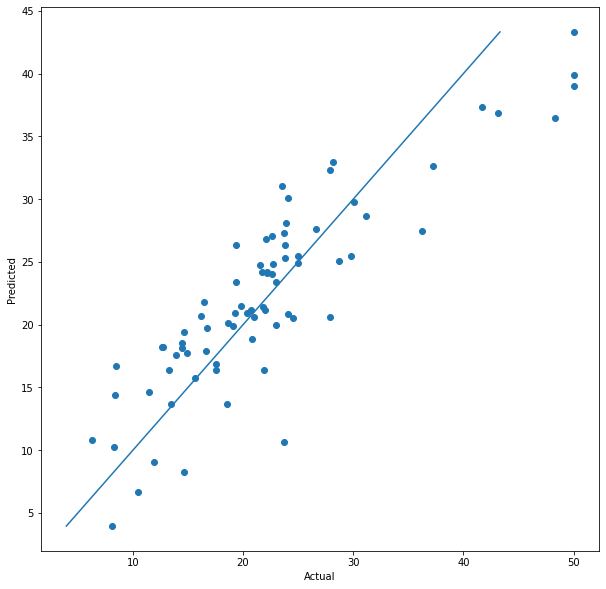

In [42]:
#matplotlib is a library to plot the curves
#part of data visualization

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(Y_test,y_test_predict)
plt.plot([min(y_test_predict),max(y_test_predict)],[min(y_test_predict),max(y_test_predict)])
plt.xlabel('Actual')
plt.ylabel('Predicted')
